# Introduction to business intelligence for a online movie rental database

In this notebook we will work with a SQlite database from a fictional movie rental company called MovieNow. MovieNow offers an online platform for streaming movies. Customers can rent a movie for 24 hours. For all movies, the company stores additional information such as the genre or the main actors. MovieNow also stores information about customers and movie ratings.

## The data

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandasql as ps

In [39]:
actors=pd.read_csv('./actors_181127_2.csv')
actsin=pd.read_csv('./actsin_181127_2.csv')
customers=pd.read_csv('./customers_181127_2.csv')
movies=pd.read_csv('./movies_181127_2.csv')
renting=pd.read_csv('./renting_181127_2.csv')
customers

,customer_id,name,country,gender,date_of_birth,date_account_start
0,1,Robert Bohm,Austria,male,1980-07-30,2018-09-02
1,2,Wolfgang Ackermann,Austria,male,1971-11-17,2018-10-15
2,3,Daniela Herzog,Austria,female,1974-08-07,2019-02-14
3,4,Julia Jung,Austria,female,1991-01-04,2017-11-22
4,5,Juliane Kirsch,Austria,female,1977-03-01,2018-12-16
...,...,...,...,...,...,...
118,119,Lisa Ibarra Valadez,Spain,female,1998-12-08,2019-03-06
119,120,Robin J. Himes,USA,male,1988-11-30,2018-08-06
120,121,Annie R. Barnett,USA,female,1987-03-02,2017-09-13
121,122,Thelma B. Coward,USA,female,1971-04-15,2018-11-27


## Exploring the tables

The following image describes the tables structure.

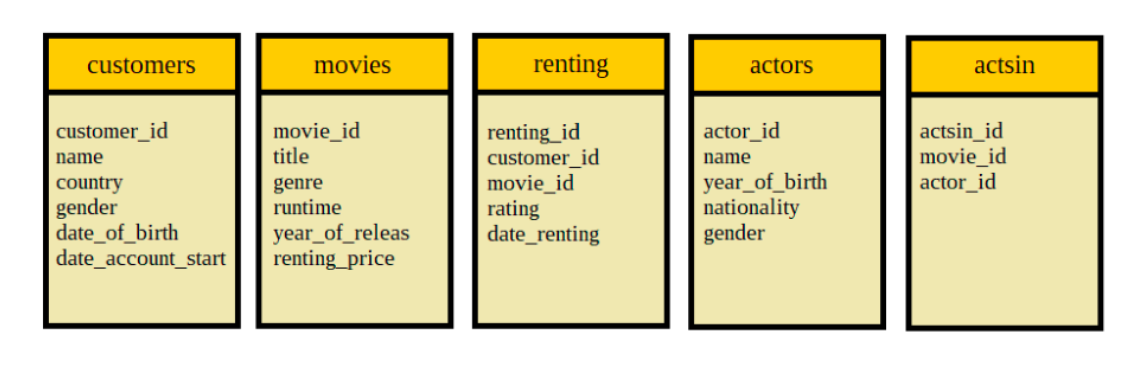

In [40]:

from IPython.display import display
from IPython.display import Image
i=Image(filename='./tables_description.png')
display(i)

# Simple queries

## Average movie rating 

In [41]:
q='''
SELECT movie_id, 
       AVG(rating) AS avg_rating,
       COUNT(rating) AS number_ratings,
       COUNT(*) AS number_renting
FROM renting
GROUP BY movie_id
ORDER BY avg_rating DESC
'''
df_1= ps.sqldf(q)
df_1

,movie_id,avg_rating,number_ratings,number_renting
0,48,10.000000,2,5
1,5,9.750000,4,8
2,42,9.600000,5,10
3,63,9.333333,6,11
4,65,9.000000,5,5
...,...,...,...,...
66,68,6.333333,3,7
67,59,6.000000,2,5
68,43,6.000000,1,4
69,56,5.666667,3,4


## Average rating per customer

In [42]:
q=''' 
SELECT customer_id, -- Report the customer_id
      AVG(rating),  -- Report the average rating per customer
      COUNT(rating),  -- Report the number of ratings per customer
      COUNT(*)  -- Report the number of movie rentals per customer
FROM renting
GROUP BY customer_id
HAVING COUNT(*)>7 -- Select only customers with more than 7 movie rentals
ORDER BY AVG(rating) ASC -- Order by the average rating in ascending order'''
df_2= ps.sqldf(q)
df_2

,customer_id,AVG(rating),COUNT(rating),COUNT(*) -- Report the number of movie rentals per customer
0,104,6.250000,4,8
1,28,6.714286,7,11
2,111,7.000000,3,10
3,113,7.000000,7,15
4,25,7.200000,5,10
5,21,7.333333,6,14
6,92,7.571429,7,11
7,49,7.625000,8,13
8,35,7.666667,6,9
9,52,7.875000,8,9


Customer number 104 gave the lowest average ratings for 4 movies. 


## Average rating for customers from Belgium

In [43]:
q='''
SELECT AVG(rating)
FROM renting AS r
LEFT JOIN customers AS c
ON r.customer_id = c.customer_id
WHERE c.country='Belgium'
'''
df_3= ps.sqldf(q)
df_3

,AVG(rating)
0,8.9


## Aggregating revenue, rentals and active customers in 2018

In [44]:
q='''SELECT 
	SUM(m.renting_price), 
	COUNT(*), 
	COUNT(DISTINCT r.customer_id)
FROM renting AS r
LEFT JOIN movies AS m
ON r.movie_id = m.movie_id
-- Only look at movie rentals in 2018
WHERE date_renting BETWEEN '2018-01-01' AND '2018-12-31'
'''
df_4= ps.sqldf(q)
df_4

,SUM(m.renting_price),COUNT(*),COUNT(DISTINCT r.customer_id)
0,658.02,298,93


## Movies and actors

In [45]:
q='''
SELECT m.title, a.name
FROM actsin
LEFT JOIN movies AS m
ON m.movie_id = actsin.movie_id
LEFT JOIN actors AS a
ON a.actor_id = actsin.actor_id
'''
df_5= ps.sqldf(q)
df_5

,title,name
0,Candy,Abbie Cornish
1,Jack and Jill,Adam Sandler
2,Simone,Al Pacino
3,The Recruit,Al Pacino
4,Two for the Money,Al Pacino
...,...,...
208,The Help,Viola Davis
209,Ghost Rider: Spirit of Vengeance,Violante Placido
210,Rio 2,will.i.am
211,The Sessions,William H. Macy


# Sub-queries

## Income from movies

In [46]:
q='''
SELECT rm.title,
       SUM(rm.renting_price) AS income_movie
FROM
       (SELECT m.title,  
               m.renting_price
       FROM renting AS r
       LEFT JOIN movies AS m
       ON r.movie_id=m.movie_id) AS rm
GROUP BY rm.title
ORDER BY income_movie DESC
'''
df_6= ps.sqldf(q)
df_6

,title,income_movie
0,Bridget Jones - The Edge of Reason,37.57
1,Fair Game,34.68
2,The Kingdom,31.35
3,Two for the Money,30.69
4,Simone,29.59
...,...,...
66,Ghost Rider: Spirit of Vengeance,8.95
67,The Invasion,8.36
68,Jack and Jill,8.36
69,The Human Stain,7.96


## Age of actors from the USA

In [47]:
q= '''
SELECT gender, 
      MIN(year_of_birth), 
      MAX(year_of_birth) 
FROM
   (SELECT * 
   FROM actors
   WHERE nationality='USA') AS a 
GROUP BY gender
'''
df_7= ps.sqldf(q)
df_7

,gender,MIN(year_of_birth),MAX(year_of_birth)
0,female,1945.0,1993.0
1,male,1930.0,1992.0


## Identify favorite movies for a group of customers

In [48]:
q='''
SELECT m.title, 
COUNT(*),
AVG(r.rating)
FROM renting AS r
LEFT JOIN customers AS c
ON c.customer_id = r.customer_id
LEFT JOIN movies AS m
ON m.movie_id = r.movie_id
WHERE c.date_of_birth BETWEEN '1970-01-01' AND '1979-12-31'
GROUP BY m.title
HAVING COUNT(*)>1 -- Remove movies with only one rental
ORDER BY AVG(rating) DESC; -- Order with highest rating first
'''
df_8= ps.sqldf(q)
df_8

,title,COUNT(*),AVG(r.rating)
0,The Fighter,4,10.000000
1,The Fellowship of the Ring,2,10.000000
2,One Night at McCool's,2,10.000000
3,No Country for Old Men,3,10.000000
4,I'm Not There,2,10.000000
5,Django Unchained,4,10.000000
6,Secondhand Lions,4,9.666667
7,Winter's Bone,2,9.500000
8,Fool's Gold,4,9.333333
9,The Help,3,9.000000


## Identify favorite actors for Spain

In [49]:
q='''
SELECT a.name,  c.gender,
       COUNT(*) AS number_views, 
       AVG(r.rating) AS avg_rating
FROM renting as r
LEFT JOIN customers AS c
ON r.customer_id = c.customer_id
LEFT JOIN actsin as ai
ON r.movie_id = ai.movie_id
LEFT JOIN actors as a
ON ai.actor_id = a.actor_id
WHERE  c.country='Spain'-- Select only customers from Spain
GROUP BY a.name, c.gender
HAVING AVG(r.rating) IS NOT NULL 
  AND COUNT(*) > 5 
ORDER BY avg_rating DESC, number_views DESC
'''
df_9= ps.sqldf(q)
df_9

,name,gender,number_views,avg_rating
0,Catherine Keener,female,6,8.0
1,Rupert Grint,male,7,7.6
2,Emma Watson,male,7,7.6
3,Daniel Radcliffe,male,7,7.6


We found out that in this table Catherine Keener is the favorite actress among female Spain customers and that male customers from Spain like the actors from Harry Potter best: Emma Watson, Daniel Radcliffe and Rupert Grint.

In [50]:
q='''
SELECT 
	c.country, 
	COUNT(r.renting_id) AS number_renting, 
	AVG(r.rating) AS average_rating, 
	SUM(m.renting_price) AS revenue  
FROM renting AS r
LEFT JOIN customers AS c
ON c.customer_id = r.customer_id
LEFT JOIN movies AS m
ON m.movie_id = r.movie_id
WHERE date_renting >= '2019-01-01'
GROUP BY country
'''
df_10= ps.sqldf(q)
df_10

,country,number_renting,average_rating,revenue
0,Austria,5,7.333333,9.95
1,Belgium,7,9.000000,13.13
2,Denmark,7,7.714286,14.63
3,France,23,7.533333,51.07
4,Great Britan,9,7.200000,17.91
5,Hungary,11,7.166667,25.89
6,Italy,30,8.235294,69.90
7,Poland,21,8.125000,49.29
8,Slovenia,14,8.000000,30.26
9,Spain,26,8.076923,57.94


# Nested Queries

## Often rented movies

In [51]:
q= '''SELECT *
FROM movies
WHERE movie_id IN  -- Select movie IDs from the inner query
	(SELECT movie_id
	FROM renting
	GROUP BY movie_id
	HAVING COUNT(*) > 5)
'''
df_11= ps.sqldf(q)
df_11

,movie_id,title,genre,runtime,year_of_releas,renting_price
0,1,One Night at McCool's,Comedy,93,2001,2.09
1,2,Swordfish,Drama,99,2001,2.19
2,3,What Women Want,Comedy,127,2001,2.59
3,4,Training Day,Drama,122,2001,1.79
4,5,The Fellowship of the Ring,Science Fiction & Fantasy,178,2001,2.59
5,6,Harry Potter and the Philosopher's Stone,Science Fiction & Fantasy,152,2001,2.69
6,7,The Royal Tenenbaums,Comedy,110,2002,1.89
7,10,Simone,Drama,117,2002,2.69
8,11,Showtime,Comedy,95,2002,1.79
9,12,The Two Towers,Science Fiction & Fantasy,179,2002,2.39


## Frequent customers

In [52]:
q= '''
SELECT *
FROM customers
WHERE customer_id IN           
	(SELECT customer_id
	FROM renting
	GROUP BY customer_id
	HAVING COUNT(renting_id)>10)
'''
df_12= ps.sqldf(q)
df_12

,customer_id,name,country,gender,date_of_birth,date_account_start
0,21,Avelaine Corbeil,France,female,1986-03-17,2017-06-11
1,28,Sidney Généreux,France,male,1980-12-01,2017-02-04
2,49,Havasy Kristof,Hungary,male,1998-06-13,2017-01-18
3,92,Honorata Nowak,Poland,female,1986-05-02,2017-09-21
4,113,Lucy Centeno Barrios,Spain,female,1970-11-03,2017-06-13
5,114,Canela Gaona Lozano,Spain,female,1997-04-01,2017-02-14


## Movies with rating above average

In [53]:
q='''
SELECT title 
FROM movies
WHERE movie_id IN
	(SELECT movie_id
	 FROM renting
     GROUP BY movie_id
     HAVING AVG(rating) > 
		(SELECT AVG(rating)
		 FROM renting))
'''
df_13= ps.sqldf(q)
df_13

,title
0,What Women Want
1,The Fellowship of the Ring
2,Harry Potter and the Philosopher's Stone
3,The Royal Tenenbaums
4,Waking Up in Reno
5,11'09''01 September 11
6,Harry Potter and the Chamber of Secrets
7,25th Hour
8,The Human Stain
9,Secondhand Lions


# Correlated nested queries

## Analizing customer behavior

## Customers with less than 5 movie rentals

In [54]:
q='''SELECT *
FROM customers as c
WHERE 5> 
	(SELECT count(*)
	FROM renting as r
	WHERE r.customer_id = c.customer_id)
'''
df_14= ps.sqldf(q)
df_14

,customer_id,name,country,gender,date_of_birth,date_account_start
0,2,Wolfgang Ackermann,Austria,male,1971-11-17,2018-10-15
1,3,Daniela Herzog,Austria,female,1974-08-07,2019-02-14
2,4,Julia Jung,Austria,female,1991-01-04,2017-11-22
3,5,Juliane Kirsch,Austria,female,1977-03-01,2018-12-16
4,6,Rowanne Couperus,Belgium,female,1994-04-05,2018-08-26
...,...,...,...,...,...,...
61,117,Moira Jurado Paez,Spain,female,1996-01-30,2018-11-09
62,119,Lisa Ibarra Valadez,Spain,female,1998-12-08,2019-03-06
63,120,Robin J. Himes,USA,male,1988-11-30,2018-08-06
64,122,Thelma B. Coward,USA,female,1971-04-15,2018-11-27


## Customers who gave low ratings

In [55]:
q='''
SELECT *
FROM customers AS c
WHERE 4> 
	(SELECT MIN(rating)
	FROM renting AS r
	WHERE r.customer_id = c.customer_id)
'''
df_15= ps.sqldf(q)
df_15

,customer_id,name,country,gender,date_of_birth,date_account_start
0,28,Sidney Généreux,France,male,1980-12-01,2017-02-04
1,41,Zara Mitchell,Great Britan,female,1994-07-08,2017-06-12
2,86,Albin Jaworski,Poland,male,1984-05-01,2017-12-15
3,120,Robin J. Himes,USA,male,1988-11-30,2018-08-06


## Movies and ratings with correlated queries

### Movies with more than 5 ratings

In [56]:
q='''SELECT *
FROM movies AS m
WHERE 5 < 
	(SELECT COUNT(rating)
	FROM renting AS r
	WHERE r.movie_id=m.movie_id)
'''
df_16= ps.sqldf(q)
df_16

,movie_id,title,genre,runtime,year_of_releas,renting_price
0,4,Training Day,Drama,122,2001,1.79
1,10,Simone,Drama,117,2002,2.69
2,12,The Two Towers,Science Fiction & Fantasy,179,2002,2.39
3,14,The Recruit,Mystery & Suspense,115,2003,1.69
4,22,Imagining Argentina,Art House & International,107,2004,2.59
5,23,Shall We Dance,Drama,106,2004,1.69
6,25,Bridget Jones - The Edge of Reason,Drama,108,2004,2.89
7,27,Monster,Drama,109,2004,2.09
8,28,Harry Potter and the Prisoner of Azkaban,Science Fiction & Fantasy,142,2004,1.69
9,29,Two for the Money,Drama,122,2005,2.79


### Movies with an average rating higher than 8.

In [57]:
q='''
SELECT *
FROM movies AS m
WHERE 8 < -- Select all movies with an average rating higher than 8
	(SELECT AVG(rating)
	FROM renting AS r
	WHERE r.movie_id = m.movie_id)
'''
df_17= ps.sqldf(q)
df_17

,movie_id,title,genre,runtime,year_of_releas,renting_price
0,3,What Women Want,Comedy,127,2001,2.59
1,5,The Fellowship of the Ring,Science Fiction & Fantasy,178,2001,2.59
2,6,Harry Potter and the Philosopher's Stone,Science Fiction & Fantasy,152,2001,2.69
3,9,11'09''01 September 11,Drama,134,2002,2.99
4,16,25th Hour,Drama,135,2003,1.59
5,18,Secondhand Lions,Drama,111,2003,1.69
6,22,Imagining Argentina,Art House & International,107,2004,2.59
7,24,Welcome to Mooseport,Comedy,110,2004,2.89
8,26,Ray,Drama,152,2004,2.59
9,27,Monster,Drama,109,2004,2.09


# Nested queries with EXISTS function

## Customers with at least one rating

In [58]:
q='''
SELECT *
FROM customers AS c -- Select all customers with at least one rating
WHERE EXISTS
	(SELECT *
	FROM renting AS r
	WHERE rating IS NOT NULL 
	AND r.customer_id = c.customer_id)
'''
df_18= ps.sqldf(q)
df_18

,customer_id,name,country,gender,date_of_birth,date_account_start
0,1,Robert Bohm,Austria,male,1980-07-30,2018-09-02
1,2,Wolfgang Ackermann,Austria,male,1971-11-17,2018-10-15
2,4,Julia Jung,Austria,female,1991-01-04,2017-11-22
3,7,Annelous Sneep,Belgium,female,1993-11-14,2018-05-12
4,8,Jaëla van den Dolder,Belgium,female,1990-08-31,2018-02-08
...,...,...,...,...,...,...
99,118,Digna Mateo Carrasquill,Spain,female,1978-11-01,2017-11-24
100,119,Lisa Ibarra Valadez,Spain,female,1998-12-08,2019-03-06
101,120,Robin J. Himes,USA,male,1988-11-30,2018-08-06
102,121,Annie R. Barnett,USA,female,1987-03-02,2017-09-13


## Actors in comedies

In [59]:
q='''
SELECT a.nationality, COUNT(*) -- Report the nationality and the number of actors for each nationality
FROM actors AS a
WHERE EXISTS
	(SELECT ai.actor_id
	 FROM actsin AS ai
	 LEFT JOIN movies AS m
	 ON m.movie_id = ai.movie_id
	 WHERE m.genre = 'Comedy'
	 AND ai.actor_id = a.actor_id)
GROUP BY a.nationality
'''
df_19= ps.sqldf(q)
df_19

,nationality,COUNT(*) -- Report the nationality and the number of actors for each nationality
0,British,3
1,Canada,1
2,Northern Ireland,1
3,South Africa,1
4,USA,22


# Union and Intersection

## Young actors not coming from the USA and are born after 1990

In [60]:
q='''
SELECT name, 
       nationality, 
       year_of_birth
FROM actors
WHERE nationality <> 'USA'
INTERSECT -- Select all actors who are not from the USA and who are also born after 1990
SELECT name, 
       nationality, 
       year_of_birth
FROM actors
WHERE year_of_birth > 1990
'''
df_20= ps.sqldf(q)
df_20

,name,nationality,year_of_birth
0,Freddie Highmore,British,1992.0


## Dramas with high rating

In [61]:
q='''
SELECT *
FROM movies
WHERE movie_id IN
   (SELECT movie_id
    FROM movies
    WHERE genre = 'Drama'
    INTERSECT
    SELECT movie_id
    FROM renting
    GROUP BY movie_id
    HAVING AVG(rating)>9)
'''
df_21= ps.sqldf(q)
df_21

,movie_id,title,genre,runtime,year_of_releas,renting_price
0,42,No Country for Old Men,Drama,122,2007,1.49


# OLAP: cube operator

## Group by cube

In [62]:
movies_cube_df=movies.drop(columns=['runtime','renting_price','title'])
#movies_cube_df.set_index('movie_id',inplace=True)
movies_cube_df.index.name='row_number'
movies_cube_df

,movie_id,genre,year_of_releas
row_number,,,
0,1,Comedy,2001
1,2,Drama,2001
2,3,Comedy,2001
3,4,Drama,2001
4,5,Science Fiction & Fantasy,2001
...,...,...,...
66,67,Drama,2013
67,68,Mystery & Suspense,2013
68,69,Mystery & Suspense,2013


In [63]:
import atoti as tt

session = tt.create_session("Analysis MovieNow")
movies_table = session.read_pandas( movies_cube_df, keys=["row_number"],table_name="movies_table")
movies_table

Deleting existing "Analysis MovieNow" session to create the new one.


Table(_name='movies_table', _scenario='Base', _columns={'row_number': Column(name='row_number', data_type=DataType(java_type='long', nullable=False)), 'movie_id': Column(name='movie_id', data_type=DataType(java_type='long', nullable=True)), 'genre': Column(name='genre', data_type=DataType(java_type='string', nullable=False)), 'year_of_releas': Column(name='year_of_releas', data_type=DataType(java_type='long', nullable=True))})

In [64]:
cube_01 = session.create_cube(movies_table)


In [65]:
h_01 = cube_01.hierarchies
h_01

Hierarchies()

In [66]:
cube_01.create_parameter_hierarchy_from_column(
    "year_of_releas", movies_table["year_of_releas"]
)

In [67]:
h_01 = cube_01.hierarchies
h_01

Hierarchies()

In [68]:
h_01["year_of_releas"].dimension="movies_table"
h_01

Hierarchies()

In [69]:
m_01=cube_01.measures
m_01

Measures()

In [70]:
l_01=cube_01.levels
l_01

Levels()

In [71]:
cube_01.query(m_01["contributors.COUNT"], levels=[l_01["year_of_releas"],l_01["genre"]])



contributors.COUNT
year_of_releas genre                                       
2001           Action & Adventure                         3
               Animation                                  2
               Art House & International                  1
               Comedy                                    10
               Drama                                     36
...                                                     ...
2014           Comedy                                    10
               Drama                                     36
               Mystery & Suspense                         6
               Other                                      2
               Science Fiction & Fantasy                 11

[112 rows x 1 columns]

## Analyzing average ratings

In [72]:
q='''
SELECT 
	c.country,
    m.genre,
    r.rating
FROM renting AS r
LEFT JOIN movies AS m
ON m.movie_id = r.movie_id
LEFT JOIN customers AS c
ON r.customer_id = c.customer_id
'''
df_22= ps.sqldf(q)
df_22.index.name='row_number'
df_22


,country,genre,rating
row_number,,,
0,Great Britan,Comedy,NaN
1,Belgium,Drama,10.0
2,Spain,Drama,4.0
3,Great Britan,Drama,8.0
4,Spain,Comedy,7.0
...,...,...,...
573,Belgium,Mystery & Suspense,NaN
574,Hungary,Science Fiction & Fantasy,10.0
575,Great Britan,Drama,NaN


In [73]:
session02 = tt.create_session("session_02")
df_22_table = session02.read_pandas( df_22, keys=["row_number"],table_name="df_22_table")
cube_02 = session.create_cube(df_22_table)

Deleting existing "session_02" session to create the new one.


AtotiJavaException: None

In [ ]:
h = cube_02.hierarchies
h

Hierarchies()

In [ ]:
l_02=cube_02.levels
l_02

Levels()

In [ ]:
m_02=cube_02.measures
m_02

Measures()

In [ ]:
pd.set_option('display.max_rows', 1000)
cube_02.query(m_02["rating.MEAN"], levels=[l_02["country"],l_02["genre"]])

rating.MEAN
country      genre                                
Austria      Animation                       10.00
             Comedy                           8.00
             Drama                            6.00
             Science Fiction & Fantasy        6.67
Belgium      Drama                            9.17
             Science Fiction & Fantasy        8.50
Denmark      Drama                            7.60
             Mystery & Suspense               7.25
             Science Fiction & Fantasy        9.25
France       Action & Adventure               9.00
             Animation                        9.00
             Comedy                           6.00
             Drama                            7.85
             Mystery & Suspense               6.00
             Other                            8.00
             Science Fiction & Fantasy        8.12
Great Britan Action & Adventure               9.00
             Art House & International        9.00
             Comedy                          10.00
             Drama                            7.31
             Mystery & Suspense               8.00
             Science Fiction & Fantasy        6.40
Hungary      Action & Adventure              10.00
             Animation                        8.00
             Art House & International        7.00
             Comedy                           7.50
             Drama                            7.42
             Mystery & Suspense               6.33
             Other                            8.50
             Science Fiction & Fantasy        8.40
Italy        Action & Adventure               9.25
             Animation                        7.00
             Art House & International        9.00
             Comedy                           8.50
             Drama                            7.97
             Mystery & Suspense               6.50
             Other                            9.67
             Science Fiction & Fantasy        7.67
Poland       Action & Adventure               8.50
             Comedy                           8.20
             Drama                            7.82
             Other                           10.00
             Science Fiction & Fantasy        8.38
Slovenia     Animation                        6.00
             Art House & International        8.00
             Comedy                           7.40
             Drama                            8.37
             Other                           10.00
             Science Fiction & Fantasy        9.83
Spain        Action & Adventure               9.00
             Art House & International        9.50
             Comedy                           6.50
             Drama                            7.53
             Mystery & Suspense               7.25
             Other                            7.00
             Science Fiction & Fantasy        8.20
USA          Animation                        8.00
             Comedy                          10.00
             Drama                            9.00
             Mystery & Suspense               3.00
             Science Fiction & Fantasy        7.00

In [ ]:
session02.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

# Rollup